### Применение TSLearn к анализу временной серии с использованием 2-х слойной модели GRU

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.datasets import CachedDatasets

In [3]:
from load_csv import df
# clear all indexes
df = df.reset_index(drop=True)
df1 = df[['Date','Infections']]
df1.reset_index(drop=True)
df1['Inf_day'] = df1['Infections'].diff().fillna(df1['Infections'])
l = df1['Date']
ts = df1['Inf_day']
data = ts.values
X = data.reshape(data.shape[0])
print(X)


            Infections  Dead  Recover  Infect_by_date  inf_day
Date                                                          
28.03.2020           6     0        0               6      NaN
29.03.2020           6     0        0               6      0.0
30.03.2020           9     1        0               8      3.0
31.03.2020           9     1        0               8      0.0
01.04.2020           9     2        0               7      0.0
['Infections', 'Dead', 'Recover', 'Infect_by_date', 'inf_day']
Date
28.03.2020   2020-03-28
29.03.2020   2020-03-29
30.03.2020   2020-03-30
31.03.2020   2020-03-31
01.04.2020   2020-04-01
                ...    
30.05.2023   2023-05-30
06.06.2023   2023-06-06
13.06.2023   2023-06-13
20.06.2023   2023-06-20
27.06.2023   2023-06-27
Name: Date, Length: 1149, dtype: datetime64[ns]
Date
28.03.2020       0.0
29.03.2020       1.0
30.03.2020       2.0
31.03.2020       3.0
01.04.2020       4.0
               ...  
30.05.2023    1158.0
06.06.2023    1165.0
13.06.

C:\Users\Alex\AppData\Local\Temp\ipykernel_144480\3674077191.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Inf_day'] = df1['Infections'].diff().fillna(df1['Infections'])


In [4]:
# Normalize the data
import matplotlib.pyplot as plt
# Normalize the data
scaler = TimeSeriesScalerMeanVariance()
X_normalized = scaler.fit_transform([X])

X_n = X_normalized[0]
                                    
print(X_n)
#plt.plot(X_normalized)тся


[[-0.7141232 ]
 [-0.75404669]
 [-0.73408494]
 ...
 [-0.60100664]
 [-0.68085362]
 [-0.57439098]]


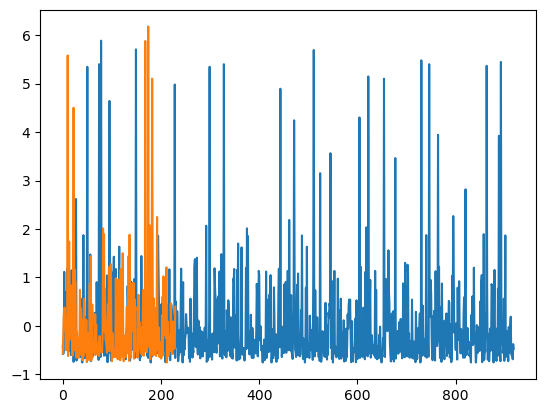

In [5]:
from tslearn.utils import to_time_series_dataset
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_n, X_n, test_size=0.2, random_state=42)
plt.plot(X_train)
plt.plot(X_test)


In [28]:
from keras.models import Sequential
from keras.layers import GRU, Dense

# Set the number of units 20 - 100
UNITS = 15
UNITS2 = 10

# Build the GRU model
model = Sequential()
# Add the GRU layer and return_sequences=True (for connection to the next layer),
model.add(GRU(units=UNITS, activation='relu', return_sequences=True, input_shape=(X_normalized.shape[1], X_normalized.shape[2])))
model.add(GRU(units=UNITS2, return_sequences=False, activation='relu'))
model.add(Dense(1))  # Output layer for regression
model.compile(optimizer='adam', loss='mse')

In [29]:
EPOCHS = 100
BATCH_SIZE = 30

# Train the model
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

Epoch 1/100
31/31 [==============================] - 3s 18ms/step - loss: 0.9607 - val_loss: 0.9820
Epoch 2/100
31/31 [==============================] - 0s 3ms/step - loss: 0.8872 - val_loss: 0.8957
Epoch 3/100
31/31 [==============================] - 0s 3ms/step - loss: 0.7803 - val_loss: 0.7625
Epoch 4/100
31/31 [==============================] - 0s 3ms/step - loss: 0.6231 - val_loss: 0.5576
Epoch 5/100
31/31 [==============================] - 0s 3ms/step - loss: 0.4067 - val_loss: 0.3299
Epoch 6/100
31/31 [==============================] - 0s 3ms/step - loss: 0.1945 - val_loss: 0.1114
Epoch 7/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0552 - val_loss: 0.0243
Epoch 8/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0133 - val_loss: 0.0063
Epoch 9/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 0.0021
Epoch 10/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 11

In [30]:
# Make predictions on the entire dataset
print(X_n)


[[-0.7141232 ]
 [-0.75404669]
 [-0.73408494]
 ...
 [-0.60100664]
 [-0.68085362]
 [-0.57439098]]


In [31]:
# y_pred = model.predict(X_n.reshape(X_n.shape[0], X_n.shape[1], 1))
y_pred = model.predict(X_n)
# Print the predictions

print(y_pred)

36/36 [==============================] - 0s 1ms/step
[[-0.7105617 ]
 [-0.7504136 ]
 [-0.73044556]
 ...
 [-0.5994774 ]
 [-0.6776094 ]
 [-0.57356435]]


In [32]:
from sklearn.metrics import mean_squared_error
# Calculate Mean Squared Error (MSE) as a performance metric
mse = mean_squared_error(X_n, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 9.386443840886297e-06


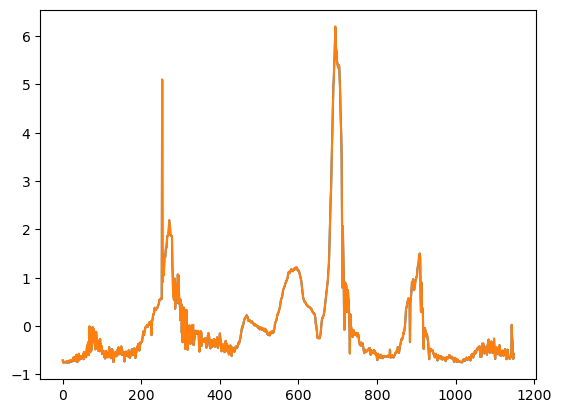

In [33]:
plt.plot(X_n)
plt.plot(y_pred)

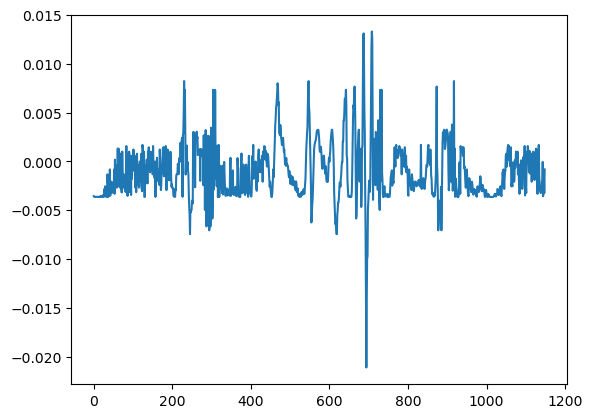

In [34]:
plt.plot(X_n-y_pred)

In [35]:
# Calculate mean and variance for inverse scaling

mu = np.mean(X)
var = np.var(X)
print(mu,var)

113.32375979112271 22586.319896742993


In [36]:
# Inverse transform predictions to get them in their original scale
y_pred_original_scale = (y_pred * np.sqrt(var)) + mu

In [37]:
import pandas as pd
df_gru = pd.DataFrame()

df_gru['X'] = X

df_gru['y_pred_original_scale'] = y_pred_original_scale

df_gru['Err'] = df_gru['y_pred_original_scale'] - df_gru['X']

df_gru['Err_Sqr'] = df_gru['Err']**2

MSE = df_gru['Err_Sqr'].sum() / len(df_gru)

print(df_gru)
print(MSE)



         X  y_pred_original_scale       Err   Err_Sqr
0      6.0               6.535248  0.535248  0.286490
1      0.0               0.546005  0.546005  0.298122
2      3.0               3.546951  0.546951  0.299156
3      0.0               0.546005  0.546005  0.298122
4      0.0               0.546005  0.546005  0.298122
...    ...                    ...       ...       ...
1144  76.0              76.536728  0.536728  0.288077
1145  68.0              68.466164  0.466164  0.217309
1146  23.0              23.229820  0.229820  0.052817
1147  11.0              11.487564  0.487564  0.237719
1148  27.0              27.124229  0.124229  0.015433

[1149 rows x 4 columns]
0.21200635102143356


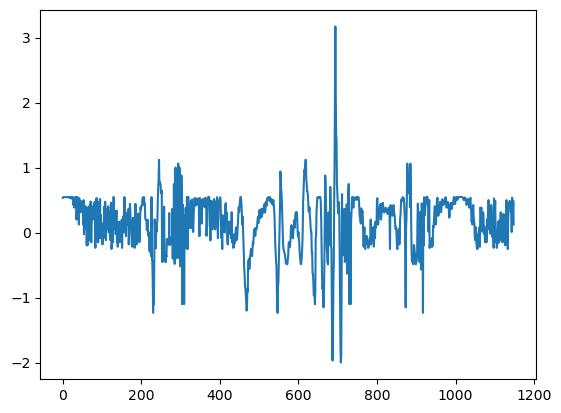

In [38]:
plt.plot(df_gru['Err'])

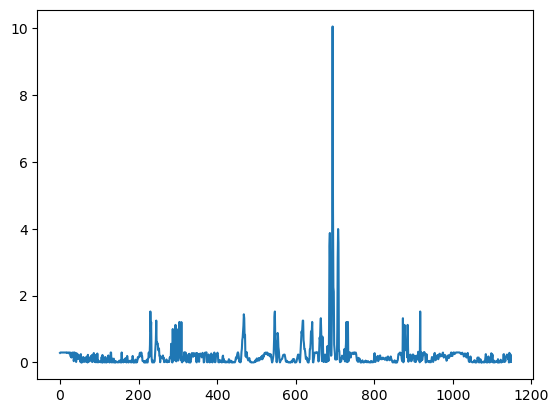

In [39]:
plt.plot(df_gru['Err_Sqr'])

(array([  6.,  19.,  55., 351., 662.,  48.,   5.,   2.,   0.,   1.]),
 array([-1.99853516, -1.48154297, -0.96455078, -0.44755859,  0.06943359,
         0.58642578,  1.10341797,  1.62041016,  2.13740234,  2.65439453,
         3.17138672]),
 <BarContainer object of 10 artists>)

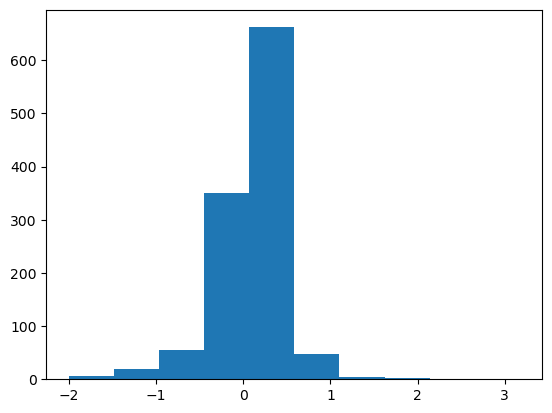

In [40]:
plt.hist(df_gru['Err'])

In [27]:
from keras.models import save_model

# Save the model to a file
model.save("my_gru_model_2layer.h5")
